## Load Data

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['object_id', 'creation_source', 'creation_time', 
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']

users = pd.read_csv('takehome_users.csv', usecols=cols)
engagement = pd.read_csv('takehome_user_engagement.csv')

## Data Wrangling

### users

In [3]:
users

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [5]:
users

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


In [6]:
users.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [7]:
users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

I am going to drop invited_by_user_id and org_id, as there are too many values to model. 

### engagement

In [8]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
print('# of users: ' + str(engagement['user_id'].nunique())), print('total logins: ' + str(len(engagement)))

# of users: 8823
total logins: 207917


(None, None)

In [10]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [11]:
engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

function to check if user is adopted 

In [12]:
def check_3_logins_7_days(dataframe):
    dataframe['date'] = dataframe['time_stamp'].dt.date
    dataframe = dataframe.drop_duplicates(subset='date').sort_values('date')
    passed = dataframe['date'].diff(periods=2)
    return any(passed <= timedelta(days=7))

In [13]:
adopted_bool = engagement.groupby('user_id').apply(check_3_logins_7_days)

In [14]:
adopted_bool.name = 'adopted'

In [15]:
print(len(adopted_bool)), print(sum(adopted_bool))

8823
1656


(None, None)

add the adopted column (our y value) to df

In [17]:
users_w_adopted = users.merge(adopted_bool, left_on='object_id', right_on='user_id')
users_w_adopted = users_w_adopted.set_index('object_id')
users_w_adopted.index_name = 'user_id'
users_w_adopted['adopted'] = users_w_adopted['adopted'].astype(int)
users_w_adopted = users_w_adopted.drop(['invited_by_user_id', 'org_id'], axis=1)


Let's drop users who only created their account in the previous 2 weeks, and thus didn't have much or any time to become an adopted user

In [18]:
users_w_adopted['creation_time'].max()

Timestamp('2014-05-30 23:59:19')

In [19]:
users_w_adopted = users_w_adopted[users_w_adopted['creation_time'] < '2014-05-16 23:59:19']

In [20]:
users_w_adopted['creation_time'].min()

Timestamp('2012-05-31 00:43:27')

In [21]:
users_w_adopted

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted
object_id,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,0
2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1
3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,0
4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,0
5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,0
...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,0
11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,0
11998,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,0


### Feature Engineering

Let's make a column about how long the user has been active

In [22]:
users_w_adopted['act_history'] = users_w_adopted['last_session_creation_time'] - users_w_adopted['creation_time']

In [23]:
users_w_adopted = users_w_adopted[['creation_time', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'act_history', 'adopted']]
users_w_adopted = users_w_adopted.drop(['creation_time', 'last_session_creation_time'], axis=1)
users_w_adopted['act_history'] = users_w_adopted['act_history'].dt.days

In [24]:
users_w_adopted

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,act_history,adopted
object_id,,,,,
1,GUEST_INVITE,1,0,0,0
2,ORG_INVITE,0,0,136,1
3,ORG_INVITE,0,0,0,0
4,GUEST_INVITE,0,0,1,0
5,GUEST_INVITE,0,0,5,0
...,...,...,...,...,...
11996,ORG_INVITE,0,0,0,0
11997,SIGNUP_GOOGLE_AUTH,0,0,5,0
11998,GUEST_INVITE,1,1,0,0


In [25]:
users_w_adopted[users_w_adopted['act_history'] > 0]

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,act_history,adopted
object_id,,,,,
2,ORG_INVITE,0,0,136,1
4,GUEST_INVITE,0,0,1,0
5,GUEST_INVITE,0,0,5,0
6,GUEST_INVITE,0,0,2,0
7,SIGNUP,0,1,4,0
...,...,...,...,...,...
11991,SIGNUP_GOOGLE_AUTH,0,0,40,0
11992,PERSONAL_PROJECTS,0,0,2,0
11995,PERSONAL_PROJECTS,0,0,1,0


Convert Catagorical data

In [26]:
source = pd.get_dummies(users_w_adopted['creation_source'])

In [27]:
source

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,,,,,
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
11996,0,1,0,0,0
11997,0,0,0,0,1
11998,1,0,0,0,0


In [28]:
df = pd.concat([users_w_adopted, source], axis=1)
df = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH', 'act_history', 'adopted']].drop('creation_source', axis=1)

In [29]:
df

,opted_in_to_mailing_list,enabled_for_marketing_drip,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,act_history,adopted
object_id,,,,,,,,
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,136,1
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...
11996,0,0,1,0,0,0,0,0
11997,0,0,0,0,0,1,5,0
11998,1,1,0,0,0,0,0,0


Our data is cleaned, although we might want to take out creation_time and last_session_creation_time

## EDA

In [164]:
round(score_unopt_train,4)
num_total = len(df)
num_adopt = len(df[df['adopted'] == 1])
percent = round(num_adopt/num_total * 100,2)
print('Out of ' + str(num_total) + ' users ' + str(num_adopt) + ' are adopted users')
print(str(percent) + '%')

Out of 8429 users 1653 are adopted users
19.61%


We have a slight class imbalance we may want to consider with in our scoring. 

<AxesSubplot:xlabel='creation_source', ylabel='count'>

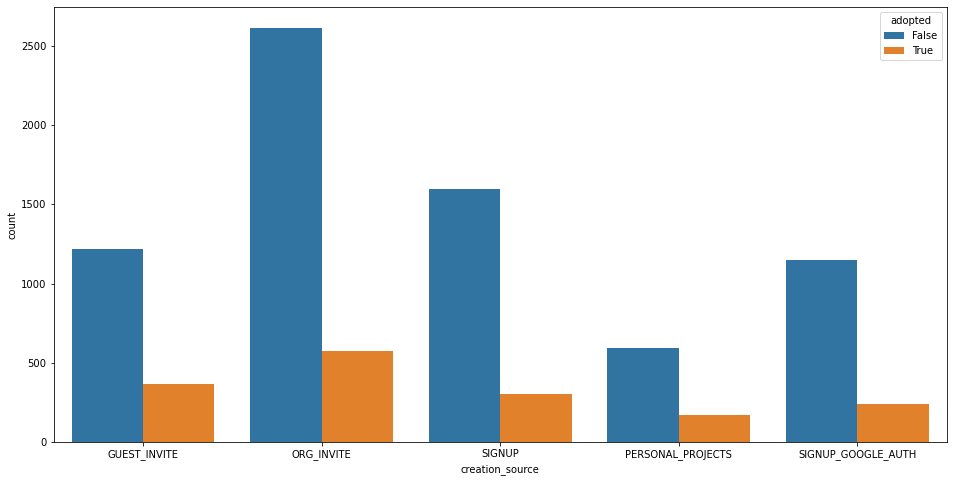

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(x='creation_source', data=users.merge(adopted_bool, left_on='object_id', right_on='user_id'), hue='adopted')

C:\Users\rotzn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rotzn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, '')]

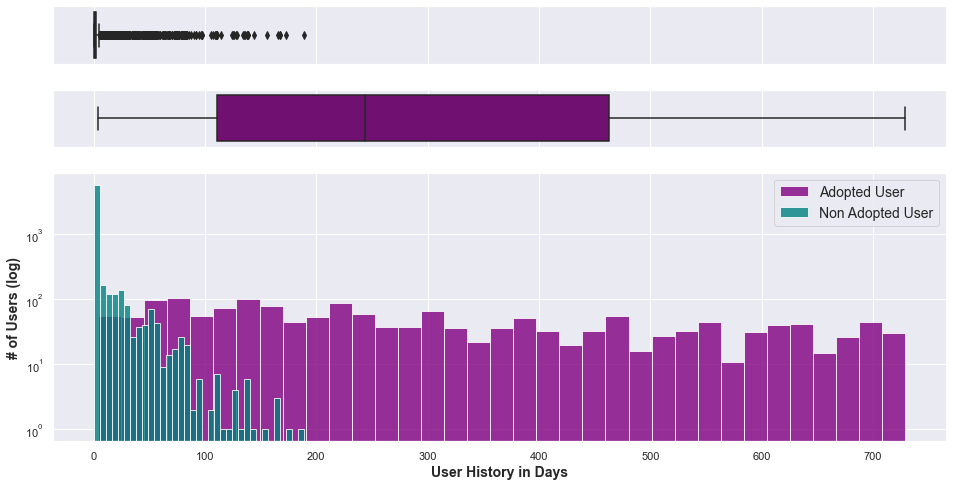

In [142]:
sns.set(style='darkgrid')

f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, figsize=(16,8), sharex=True, gridspec_kw={'height_ratios': (.15, .15, .7)})

sns.boxplot(df.loc[df['adopted'] == 0, 'act_history'], color='teal',  ax=ax_box1)
sns.boxplot(df.loc[df['adopted'] == 1, 'act_history'], color='purple', ax=ax_box2)
ax_hist.hist(df.loc[df['adopted'] == 1, 'act_history'], bins=35, color='purple', alpha=0.8, label='Adopted User')
ax_hist.hist(df.loc[df['adopted'] == 0, 'act_history'], bins=35, color='teal', alpha=0.8, label='Non Adopted User')

ax_hist.legend(fontsize=14)
ax_hist.set_xlabel('User History in Days', weight='bold', fontsize=14)
ax_hist.set_ylabel('# of Users (log)', weight='bold', fontsize=14)
ax_hist.set_yscale('log')

ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

In [31]:
df['opted_in_to_mailing_list'].value_counts()

0    6301
1    2128
Name: opted_in_to_mailing_list, dtype: int64

In [32]:
users_w_adopted.groupby('creation_source')['adopted'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.244695
ORG_INVITE            0.188239
PERSONAL_PROJECTS     0.233607
SIGNUP                0.165843
SIGNUP_GOOGLE_AUTH    0.179758
Name: adopted, dtype: float64

<AxesSubplot:>

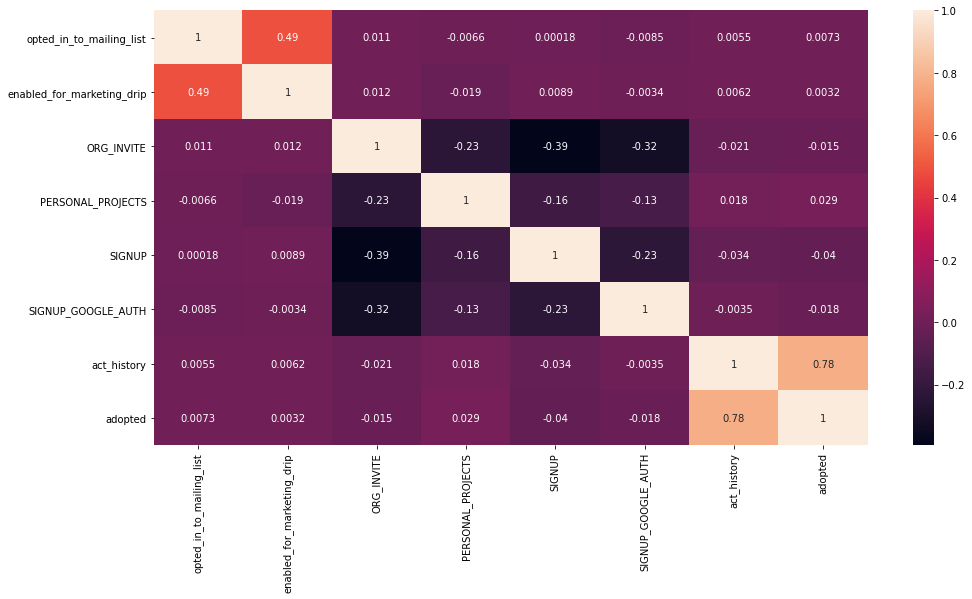

In [33]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

## Modeling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [165]:
X = df.drop('adopted', axis=1)
y = df['adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=40)

In [194]:
RF_params = {
        'n_estimators': [80,100,150,200,300, 500],
        'criterion': ['gini', 'entropy']
    }

rf = RandomForestClassifier(random_state=40)
rf_grid_search = GridSearchCV(param_grid=RF_params, estimator=rf, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
print(rf_grid_search.best_score_)

0.9520338983050849


## Final Model

In [204]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report, auc, plot_roc_curve

rf_unopt_clf = RandomForestClassifier(random_state=40)
rf_unopt_clf.fit(X_train, y_train)

y_unopt_pred = rf_unopt_clf.predict(X_train)

score_unopt_train = accuracy_score(y_train, y_unopt_pred)

# now the unoptimzed test set

rf_unopt_clf = RandomForestClassifier(random_state=40)
rf_unopt_clf.fit(X_train, y_train)

y_unopt_pred = rf_unopt_clf.predict(X_test)
y_unopt_prob = rf_unopt_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_unopt_prob)
roc_auc = auc(fpr, tpr)


cm_unopt_rf = confusion_matrix(y_test, y_unopt_pred)
score_unopt_test = accuracy_score(y_test, y_unopt_pred)


In [205]:
# optimized training set
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_train)

score_train = accuracy_score(y_train, y_pred)

# optimized test set
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:,1]
cm_rf = confusion_matrix(y_test, y_pred)


score_test = accuracy_score(y_test, y_pred)

importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
importances = importances_no_history.sort_values(ascending=True)

In [206]:
print("The resulting accuracy of the UNOPTIMIZED classifier on the TRAINING set is {}.".format(round(score_unopt_train,4)))
print("The resulting accuracy of the OPTIMIZED classifier on the TRAINING set is {}.".format(round(score_train,4)))
print("The resulting accuracy of the UNOPTIMIZED classifier on the TEST set is {}.".format(round(score_unopt_test,4)))
print("The resulting accuracy of the OPTIMIZED classifier on the TEST set is {}.".format(round(score_test,4)))

The resulting accuracy of the UNOPTIMIZED classifier on the TRAINING set is 0.9815.
The resulting accuracy of the OPTIMIZED classifier on the TRAINING set is 0.9815.
The resulting accuracy of the UNOPTIMIZED classifier on the TEST set is 0.9482.
The resulting accuracy of the OPTIMIZED classifier on the TEST set is 0.9482.


It seems optimization doesn't really do anything here. But our training and test scores are very close. We will go with upoptimized. 

In [207]:
print(classification_report(y_test, y_unopt_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2033
           1       0.88      0.85      0.87       496

    accuracy                           0.95      2529
   macro avg       0.92      0.91      0.92      2529
weighted avg       0.95      0.95      0.95      2529



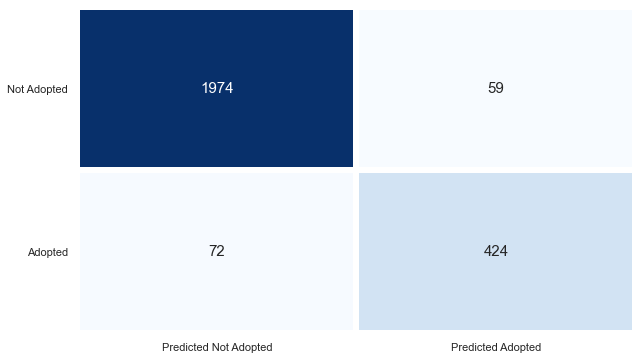

In [208]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm_unopt_rf, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not Adopted', 'Adopted'], xticklabels = ['Predicted Not Adopted', 'Predicted Adopted'])
plt.yticks(rotation = 0)
plt.show()

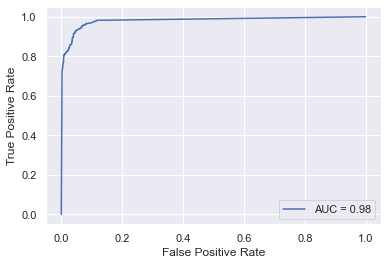

In [209]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [210]:
rf_unopt_clf.feature_importances_

array([0.00334843, 0.0028253 , 0.00244165, 0.00174509, 0.00208543,
       0.00217114, 0.98538296])

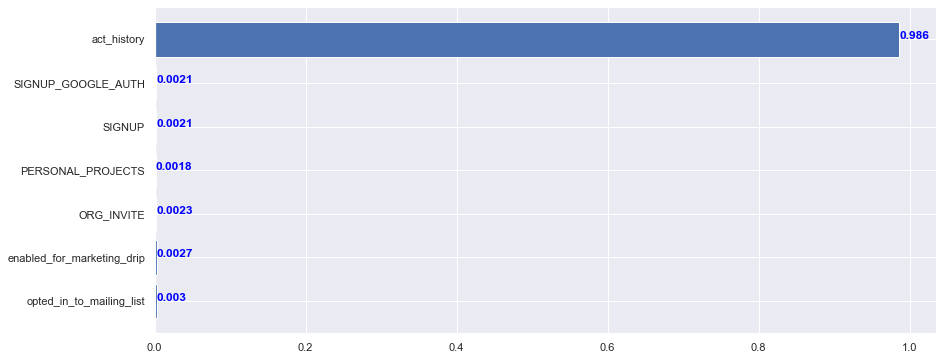

In [211]:
plt.figure(figsize=(14,6))
plt.barh(df.drop(['adopted'], axis=1).columns, rf_unopt_clf.feature_importances_)
for i, v in enumerate(rf_clf.feature_importances_.round(4)):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

It seems account history length is the best factor for predicting user adoption. Let's at least take a look what happens when we exclude act_history

In [215]:
X_train_no_hist = X_train.drop('act_history', axis=1)
X_test_no_hist = X_test.drop('act_history', axis=1)

In [216]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_no_hist, y_train)

y_pred = rf_clf.predict(X_test_no_hist)
y_prob = rf_clf.predict_proba(X_test_no_hist)[:,1]
cm_rf_no_hist = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
score_test_no_hist = accuracy_score(y_test, y_pred)

importances_no_history = pd.Series(rf_clf.feature_importances_, index=X_train.drop(['act_history'], axis=1).columns)
importances_no_history = importances_no_history.sort_values(ascending=True)
print("The resulting accuracy of the UNOPTIMIZED classifier on the TEST with no act_history set is {}.".format(round(score_test_no_hist,4)))

The resulting accuracy of the UNOPTIMIZED classifier on the TEST with no act_history set is 0.8039.


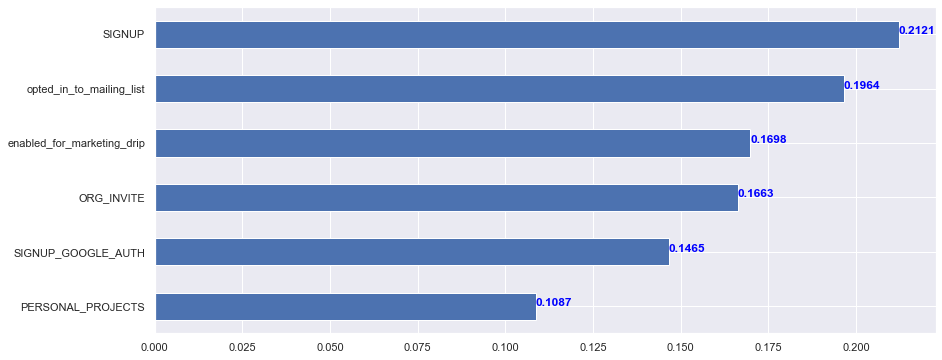

In [217]:
plt.figure(figsize=(14,6))
importances_no_history.plot.barh()
for i, v in enumerate(importances_no_history.round(4)):
    plt.text(v, i, str(v), color='blue', fontweight='bold')